In [17]:
from PIL import Image, ImageDraw
import numpy as np
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

import random

In [59]:
%run dataset.py
%run transforms.py

In [60]:
transform = transforms.Compose([
    Grayscale(3),
    Resize(224, resize_small_dim=False),
    #RandomAffine(4, shear=(-25,25), resample=Image.BILINEAR),
    CenterCrop((128,224)),
    RandomHorizontalFlip(),
    ToTensor(),
    Normalize([0,0,0],[1,1,1]),
    PadToSize((128)),
    ToPILImage()
])

print(transform)
ds = WhaleDetectionDataset('data/train', 'data/cropping.txt', transform=transform, pts_totensor=False)

Compose(
    Grayscale(num_output_channels=3)
    Resize(size=224, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(128, 224))
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0, 0, 0], std=[1, 1, 1])
    PadToSize(size=(128, 128))
    ToPILImage()
)


In [61]:
def draw_points(img, points, radius=4, color=(255,0,0)):
    draw = ImageDraw.Draw(img)
    for point in points.T:
        draw.ellipse([*(point-radius), *(point+radius)], fill=color)

def draw_bbox(img, points, color=(255,0,0)):
    draw = ImageDraw.Draw(img)
    draw.rectangle([*points.min(1), *points.max(1)], outline=(255,0,0))
    return img

1111
(224, 128)


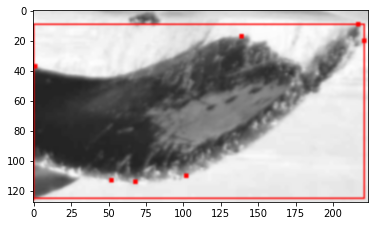

In [69]:
#random.seed(234)
idx = 1111 #random.randint(0,len(ds))
print(idx)
img, pts = ds[idx]
draw_points(img, pts, 1)
draw_bbox(img, pts)
print(img.size)
plt.imshow(img, interpolation='bicubic');

In [6]:
for i in range(len(ds)):
    img, pts = ds[i]
    assert img.size == (224, 128), img.size

In [7]:
print(pts)

[[  2.70895972  11.53958915  55.45685059 177.32180654 220.42296246
  222.81491537 131.47782165 112.07445336  93.94230733]
 [ 43.28023387  36.46289528  36.73154041  34.45798222  33.89035668
   42.51158731  92.37421184  92.32411071  87.62683094]]


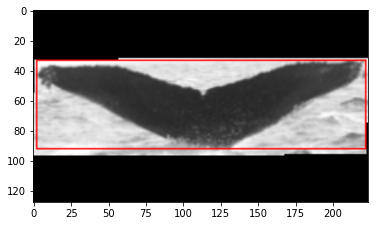

In [8]:
cx,cy = np.array(img.size)/2
center_pt = np.array([cx,cy,1]).reshape(3,1).astype(np.float32)

M = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]
])

#new_center = M @ center_pt
#M[:2,-1] += new_center[:2,0]

pts_pad = np.pad(pts, [(0,1),(0,0)], mode='constant', constant_values=1)
pts_t = (M @ pts_pad)[:2,:]

M_inv = np.linalg.inv(M)

img_t = img.transform(img.size, Image.AFFINE, M_inv[:2].ravel())
draw_bbox(img_t, pts_t)
plt.imshow(img_t, interpolation='bilinear');

In [9]:
img.transform?

In [10]:
pts.shape

(2, 9)

In [11]:
np.array([*pts.min(1), *pts.max(1)])

array([  2.70895972,  33.89035668, 222.81491537,  92.37421184])

In [12]:
pts.min(1)

array([ 2.70895972, 33.89035668])

In [13]:
pts

array([[  2.70895972,  11.53958915,  55.45685059, 177.32180654,
        220.42296246, 222.81491537, 131.47782165, 112.07445336,
         93.94230733],
       [ 43.28023387,  36.46289528,  36.73154041,  34.45798222,
         33.89035668,  42.51158731,  92.37421184,  92.32411071,
         87.62683094]])

In [54]:
img.size[0]

224